In [11]:
import pandas as pd
import numpy as np
from pydoc import help
from scipy.stats.stats import pearsonr
from sklearn import preprocessing

In [2]:
df_business = pd.read_csv('new_business.csv')

In [3]:
df_business

,Unnamed: 0,business_id,categories,city,stars,state,Noise,Wi-Fi,Price,Kids,Take-out,park
0,1,mVHrayjG3uZ_RLHkLj-AMg,"['bars', 'american (new)', 'nightlife', 'loung...",Braddock,4.5,PA,average,no,2.0,True,True,False
1,2,KayYbHCt-RkbGcPdGOThNg,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,loud,free,1.0,False,True,True
2,4,fNGIbpazjTRdXgwRY_NIXA,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,average,free,1.0,True,True,True
3,5,b9WZJp5L1RZr4F1nxclOoQ,"['breakfast & brunch', 'sandwiches', 'restaura...",Carnegie,4.5,PA,average,no,1.0,True,True,True
4,9,rv7CY8G_XibTx82YhuqQRw,['restaurants'],Carnegie,3.0,PA,average,no,1.0,True,True,False
5,11,wqu7ILomIOPSduRwoWp4AQ,"['breakfast & brunch', 'american (traditional)...",Pittsburgh,3.5,PA,average,no,1.0,True,True,False
6,12,P1fJb2WQ1mXoiudj8UE44w,"['restaurants', 'italian']",Carnegie,3.5,PA,average,no,2.0,True,True,True
7,15,PK6aSizckHFWk8i0oxt5DA,"['burgers', 'fast food', 'restaurants']",Homestead,2.0,PA,very_loud,free,1.0,True,True,False
8,16,6ilJq_05xRgek_8qUp36-g,"['burgers', 'fast food', 'restaurants']",Munhall,2.0,PA,average,no,1.0,True,True,True
9,17,1qCuOcks5HRv67OHovAVpg,"['pubs', 'bars', 'american (new)', 'nightlife'...",Homestead,3.5,PA,loud,free,2.0,False,True,True


In [4]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16273 entries, 0 to 16272
Data columns (total 12 columns):
Unnamed: 0     16273 non-null int64
business_id    16273 non-null object
categories     16273 non-null object
city           16273 non-null object
stars          16273 non-null float64
state          16273 non-null object
Noise          16273 non-null object
Wi-Fi          16273 non-null object
Price          16273 non-null float64
Kids           16273 non-null bool
Take-out       16273 non-null bool
park           16273 non-null bool
dtypes: bool(3), float64(2), int64(1), object(6)
memory usage: 1.2+ MB


In [5]:
df_business = df_business.drop('Unnamed: 0', 1)

In [6]:
df_business

,business_id,categories,city,stars,state,Noise,Wi-Fi,Price,Kids,Take-out,park
0,mVHrayjG3uZ_RLHkLj-AMg,"['bars', 'american (new)', 'nightlife', 'loung...",Braddock,4.5,PA,average,no,2.0,True,True,False
1,KayYbHCt-RkbGcPdGOThNg,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,loud,free,1.0,False,True,True
2,fNGIbpazjTRdXgwRY_NIXA,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,average,free,1.0,True,True,True
3,b9WZJp5L1RZr4F1nxclOoQ,"['breakfast & brunch', 'sandwiches', 'restaura...",Carnegie,4.5,PA,average,no,1.0,True,True,True
4,rv7CY8G_XibTx82YhuqQRw,['restaurants'],Carnegie,3.0,PA,average,no,1.0,True,True,False
5,wqu7ILomIOPSduRwoWp4AQ,"['breakfast & brunch', 'american (traditional)...",Pittsburgh,3.5,PA,average,no,1.0,True,True,False
6,P1fJb2WQ1mXoiudj8UE44w,"['restaurants', 'italian']",Carnegie,3.5,PA,average,no,2.0,True,True,True
7,PK6aSizckHFWk8i0oxt5DA,"['burgers', 'fast food', 'restaurants']",Homestead,2.0,PA,very_loud,free,1.0,True,True,False
8,6ilJq_05xRgek_8qUp36-g,"['burgers', 'fast food', 'restaurants']",Munhall,2.0,PA,average,no,1.0,True,True,True
9,1qCuOcks5HRv67OHovAVpg,"['pubs', 'bars', 'american (new)', 'nightlife'...",Homestead,3.5,PA,loud,free,2.0,False,True,True


In [7]:
df_business.Noise.value_counts()

average      11472
quiet         3258
loud          1151
very_loud      392
Name: Noise, dtype: int64

In [9]:
df_business["Wi-Fi"]

0          no
1        free
2        free
3          no
4          no
5          no
6          no
7        free
8          no
9        free
10       free
11       free
12         no
13       free
14         no
15       free
16         no
17       free
18         no
19       free
20         no
21         no
22       free
23         no
24         no
25         no
26         no
27       free
28         no
29         no
         ... 
16243    free
16244      no
16245    free
16246    free
16247      no
16248      no
16249      no
16250      no
16251      no
16252    free
16253      no
16254    paid
16255    free
16256      no
16257    free
16258    free
16259      no
16260    free
16261    free
16262    free
16263      no
16264    free
16265      no
16266    free
16267    free
16268    free
16269      no
16270    free
16271    free
16272      no
Name: Wi-Fi, dtype: object

In [12]:
# Set the random seed
np.random.seed(12)

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

In [13]:
# Convert the Sex and Embarked features to numeric values
df_business['Noise'] = label_encoder.fit_transform(df_business['Noise'])
df_business['Wi-Fi'] = label_encoder.fit_transform(df_business['Wi-Fi'])

In [14]:
df_business

,business_id,categories,city,stars,state,Noise,Wi-Fi,Price,Kids,Take-out,park
0,mVHrayjG3uZ_RLHkLj-AMg,"['bars', 'american (new)', 'nightlife', 'loung...",Braddock,4.5,PA,0,1,2.0,True,True,False
1,KayYbHCt-RkbGcPdGOThNg,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,1,0,1.0,False,True,True
2,fNGIbpazjTRdXgwRY_NIXA,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,0,0,1.0,True,True,True
3,b9WZJp5L1RZr4F1nxclOoQ,"['breakfast & brunch', 'sandwiches', 'restaura...",Carnegie,4.5,PA,0,1,1.0,True,True,True
4,rv7CY8G_XibTx82YhuqQRw,['restaurants'],Carnegie,3.0,PA,0,1,1.0,True,True,False
5,wqu7ILomIOPSduRwoWp4AQ,"['breakfast & brunch', 'american (traditional)...",Pittsburgh,3.5,PA,0,1,1.0,True,True,False
6,P1fJb2WQ1mXoiudj8UE44w,"['restaurants', 'italian']",Carnegie,3.5,PA,0,1,2.0,True,True,True
7,PK6aSizckHFWk8i0oxt5DA,"['burgers', 'fast food', 'restaurants']",Homestead,2.0,PA,3,0,1.0,True,True,False
8,6ilJq_05xRgek_8qUp36-g,"['burgers', 'fast food', 'restaurants']",Munhall,2.0,PA,0,1,1.0,True,True,True
9,1qCuOcks5HRv67OHovAVpg,"['pubs', 'bars', 'american (new)', 'nightlife'...",Homestead,3.5,PA,1,0,2.0,False,True,True


In [16]:
df_business.corr(method='spearman')

,stars,Noise,Wi-Fi,Price,Kids,Take-out,park
stars,1.000000,-0.033821,-0.054553,0.046138,-0.045596,-0.063248,0.155569
Noise,-0.033821,1.000000,0.052853,-0.045999,-0.040153,-0.066561,-0.175026
Wi-Fi,-0.054553,0.052853,1.000000,-0.094119,0.088784,-0.011400,-0.078753
Price,0.046138,-0.045999,-0.094119,1.000000,-0.338828,-0.313012,0.168855
Kids,-0.045596,-0.040153,0.088784,-0.338828,1.000000,0.373741,-0.058490
Take-out,-0.063248,-0.066561,-0.011400,-0.313012,0.373741,1.000000,-0.006178
park,0.155569,-0.175026,-0.078753,0.168855,-0.058490,-0.006178,1.000000


In [51]:
df_business.corr(method='pearson')

,stars,Noise,Wi-Fi,Price,Kids,Take-out,park
stars,1.000000,-0.041376,-0.057878,0.080483,-0.042105,-0.059078,0.188875
Noise,-0.041376,1.000000,0.058951,-0.028688,-0.027714,-0.061379,-0.173285
Wi-Fi,-0.057878,0.058951,1.000000,-0.072805,0.085493,-0.014228,-0.079878
Price,0.080483,-0.028688,-0.072805,1.000000,-0.392592,-0.390985,0.153497
Kids,-0.042105,-0.027714,0.085493,-0.392592,1.000000,0.373741,-0.058490
Take-out,-0.059078,-0.061379,-0.014228,-0.390985,0.373741,1.000000,-0.006178
park,0.188875,-0.173285,-0.079878,0.153497,-0.058490,-0.006178,1.000000


In [57]:
df_business.corr(method='kendall')

,stars,Noise,Wi-Fi,Price,Kids,Take-out,park
stars,1.000000,-0.029597,-0.048786,0.041366,-0.040918,-0.056759,0.139608
Noise,-0.029597,1.000000,0.050895,-0.043362,-0.038821,-0.064352,-0.169218
Wi-Fi,-0.048786,0.050895,1.000000,-0.091518,0.088443,-0.011357,-0.078450
Price,0.041366,-0.043362,-0.091518,1.000000,-0.330353,-0.305183,0.164632
Kids,-0.040918,-0.038821,0.088443,-0.330353,1.000000,0.373741,-0.058490
Take-out,-0.056759,-0.064352,-0.011357,-0.305183,0.373741,1.000000,-0.006178
park,0.139608,-0.169218,-0.078450,0.164632,-0.058490,-0.006178,1.000000


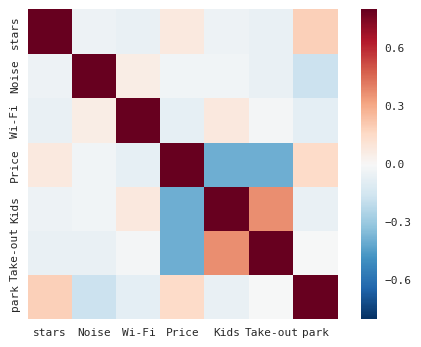

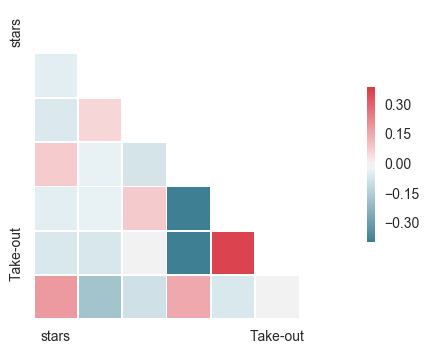

In [61]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = df_business.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.show()

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks

corrmat = df_business.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

KeyError: 'Level network must be same as name (None)'